# Volume 3: Pandas 1
    Matthew Schaelling
    Math 403
    October 12, 2017

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display, HTML

%matplotlib inline

## Problem 1

Create a pandas `Series` where the index labels are the even integers $0,2,\ldots,100$ and the entries are the label squared minus one.
That is, the $n$th entry in the `Series` is $n^2 − 1$ and has label $n$.

In [2]:
series1 = pd.Series(np.arange(0,51)**1 - 1, 
                    index = np.arange(0,51), 
                    name = "n^2 - 1")
series1[np.arange(0,51,3)] = 0
print(series1)

0      0
1      0
2      1
3      0
4      3
5      4
6      0
7      6
8      7
9      0
10     9
11    10
12     0
13    12
14    13
15     0
16    15
17    16
18     0
19    18
20    19
21     0
22    21
23    22
24     0
25    24
26    25
27     0
28    27
29    28
30     0
31    30
32    31
33     0
34    33
35    34
36     0
37    36
38    37
39     0
40    39
41    40
42     0
43    42
44    43
45     0
46    45
47    46
48     0
49    48
50    49
Name: n^2 - 1, dtype: int64


## Problem 2

Suppose you make an investment of $d$ dollars in a particularly volatile stock.
Every day the value of your stock goes up by \$$1$ with probability $p$, or down by \$$1$ with probability $1-p$ (this is an example of a _random walk_).

Write a function that accepts a probability parameter $p$ and an initial amount of money $d$, defaulting to $100$.
Use `pd.date_range()` to create an index of the days from 1 January 2000 to 31 December 2000.
Simulate the daily change of the stock by making one draw from a Bernoulli distribution with parameter $p$ (a binomial distribution with one draw) for each day.
Store the draws in a pandas `Series` with the date index and set the first draw to the initial amount $d$.
Sum the entries cumulatively to get the stock value by day.
Set any negative values to $0$, then plot the series.

Call your function with a few different values of $p$ and $d$ to observe the different possible kinds of behavior.

In [3]:
def random_walk(p, initial_fund=100):
    days = pd.date_range('1/1/2000', '12/31/2000', freq='D')
    steps = np.random.binomial(1, p, len(days))*2 - 1
    series = pd.Series(steps, index=days)
    steps[0] = initial_fund
    money = series.cumsum()
    money[money < 0] = 0
    money.plot(label=r"$p = {}$".format(p))
    plt.legend()

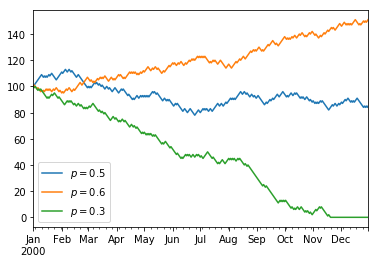

In [4]:
random_walk(.5)
random_walk(.6)
random_walk(.3)

## Problem 3

Use pandas to perform the following SQL query on the ''tables'' constructed below.

`SELECT ID, Name from studentInfo WHERE Age > 19 AND Sex = 'M'`

In [5]:
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [6]:
studentInfo[(studentInfo['Sex']=='M') & (studentInfo['Age']>19)][['ID','Age']]

,ID,Age
0,0,20
6,6,20


## Problem 4

Using a join operation, create a DataFrame containing the ID, age, and GPA of all male individuals. You ought to be able to accomplish this in one line of code.

In [7]:
pd.merge(studentInfo[studentInfo['Sex']=='M'], otherInfo, on='ID')[['ID','Age','GPA']]

,ID,Age,GPA
0,0,20,3.8
1,2,18,3.0
2,4,19,2.8
3,6,20,3.8
4,7,19,3.4


## Problem 5

The file `crime_data.csv` contains data on types of crimes committed in the United States from 1960 to 2016.
- Load the data into a pandas \li{DataFrame}, using the column names in the file and the column titled
`"Year"` as the index.
Make sure to skip lines that don't contain data.
- Insert a new column into the data frame that contains the crime rate by year (the ratio of `"Total"` column
to the `"Population"` column).
- Plot the crime rate as a function of the year.
- List the 5 years with the highest crime rate in descending order.
- Calculate the average number of total crimes as well as burglary crimes between 1960 and 2012.
- Find the years for which the total number of crimes was below average, but the number of burglaries
was above average.
- Plot the number of murders as a function of the population.
- Select the Population, Violent, and Robbery columns for all years in the 1980s, and save
this smaller data frame to a CSV file `crime_subset.csv`.


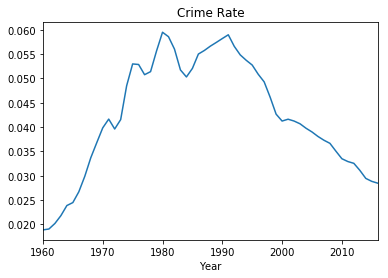



Years with the highest crime rate:
1. 1980
2. 1991
3. 1981
4. 1990
5. 1989


Time Period - 1960 to 2012
Average # of Total Crimes:		10638618.20754717
Average # of Burglary Crimes:	2446402.150943396
Years the crime rate was below average
and burglary rate was above average:


,Population,Total,Violent,Property,Murder,Forcible Rape,Robbery,Aggravated Assault,Burglary,Larceny,Vehicle Theft,Crime Rate
Year,,,,,,,,,,,,
1973,209851000,8718100,875910,7842200,19640,51400,384220,420650,2565500,4347900,928800,0.041544
1974,211392000,10253400,974720,9278700,20710,55400,442400,456210,3039200,5262500,977100,0.048504


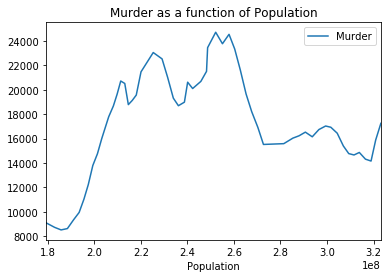

In [8]:
crime = pd.read_csv('crime_data.csv', index_col = 'Year', header = 0)
crime['Crime Rate'] = crime['Total']/crime['Population']
crime['Crime Rate'].plot(title = 'Crime Rate')
plt.show()
print("\n\nYears with the highest crime rate:")
i = 1
for year in crime.sort_values('Crime Rate', ascending = False).index[:5].values:
    print(i,'. ', year, sep='')
    i += 1
    
subset_crime = crime[crime.index < 2013]
print("\n\nTime Period - 1960 to 2012")
avg_total_crime = subset_crime['Total'].mean()
avg_burglary = subset_crime['Burglary'].mean()
print("Average # of Total Crimes:\t\t{}".format(avg_total_crime))
print("Average # of Burglary Crimes:\t{}".format(avg_burglary))

print("Years the crime rate was below average\nand burglary rate was above average:")
display(subset_crime[(subset_crime['Total'] < avg_total_crime) & (subset_crime['Burglary'] > avg_burglary)])

crime.plot(x='Population', y='Murder', title='Murder as a function of Population')

crime[crime.index.isin(np.arange(1980,1990))][['Population','Violent','Robbery']].to_csv('crime_subset.csv')

## Problem 6

In 1912 the RMS _Titanic_ sank after colliding with an iceberg.
The file `titanic.csv` contains data on the incident.
Each row represents a different passenger, and the columns describe various features of the passengers (age, sex, whether or not they survived, etc.)

Start by cleaning the data.
- Read the data into a `DataFrame`.
    Use the first row of the file as the column labels, but do not use any of the columns as the index.
- Drop the columns `"Sibsp"`, `"Parch"`, `"Cabin"`, `"Boat"`, `"Body"`, and `"home.dest"`.
- Drop any entries without data in the `"Survived"` column, then change the remaining entries to `True` or `False` (they start as 1 or 0).
- Replace null entries in the `"Age"` column with the average age.
- Save the new `DataFrame` as `titanic_clean.csv`.

Next, answer the following questions.
- How many people survived? What percentage of passengers survived?
- What was the average price of a ticket? How much did the most expensive ticket cost?
- How old was the oldest survivor? How young was the youngest survivor? What about non-survivors?


In [13]:
titanic = pd.read_csv('titanic.csv', header=0)
titanic.drop(['Sibsp','Parch','Cabin','Boat','Body','home.dest'], axis=1, inplace=True)
titanic.dropna(axis=0, subset=['Survived'], inplace=True)
titanic['Survived'] = (titanic['Survived']==1)
#titanic[titanic['Survived']==1]['Survived'] = True
#titanic[titanic['Survived']==0]['Survived'] = False
titanic['Age'].fillna(value=np.int(titanic['Age'].mean()), inplace=True)
# titanic[titanic['Age']==np.nan]['Age'] = titanic['Age'].mean()
titanic.to_csv('titanic_clean.csv')

In [17]:
print("Number Survived:\t\t{}".format(np.sum(titanic['Survived'])))
print("Percent Survived:\t\t{}".format(round(titanic['Survived'].mean()*100, 2)))
print("Average Ticket Price:\t\t{}".format(round(titanic['Fare'].mean(),2)))
print("Most Expensive Ticket:\t\t{}".format(round(titanic['Fare'].max(),2)))
print("Age of Oldest Surivor:\t\t{}".format(titanic[titanic['Survived']==True]['Age'].max()))
print("Age of Youngest Survivor:\t{}".format(titanic[titanic['Survived']==True]['Age'].min()))
print("Age of Oldest Non-Surivor:\t{}".format(titanic[titanic['Survived']==False]['Age'].max()))
print("Age of Youngest Non-Survivor:\t{}".format(titanic[titanic['Survived']==False]['Age'].min()))

Number Survived:		500
Percent Survived:		38.2
Average Ticket Price:		33.3
Most Expensive Ticket:		512.33
Age of Oldest Surivor:		80.0
Age of Youngest Survivor:	0.1667
Age of Oldest Non-Surivor:	74.0
Age of Youngest Non-Survivor:	0.3333


In [14]:
titanic.head()

,Pclass,Survived,Name,Sex,Age,Ticket,Fare,Embarked
0,1.0,True,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,S
1,1.0,True,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,S
2,1.0,False,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,S
3,1.0,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,S
4,1.0,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,S
